In [27]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [28]:
batch_size = 32
img_height = 180
img_width = 180

In [29]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Specify the path to your dataset folder on your desktop
dataset_folder = 'C:\\Users\\satya\\OneDrive\\Desktop\\ML&DL projects\\wound classification\\Wound_dataset'

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_folder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 431 files belonging to 7 classes.
Using 345 files for training.


In [31]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 431 files belonging to 7 classes.
Using 86 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)


['Abrasions', 'Bruises', 'Burns', 'Cut', 'Ingrown_nails', 'Laceration', 'Stab_wound']


In [33]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
normalization_layer = layers.Rescaling(1./255)

In [36]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.033333216 1.0


In [37]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [50]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 17s 2s/step - loss: 0.7285 - accuracy: 0.7536 - val_loss: 2.1199 - val_accuracy: 0.4419
Epoch 2/10
11/11 [==============================] - 17s 2s/step - loss: 0.7000 - accuracy: 0.7710 - val_loss: 1.9535 - val_accuracy: 0.5116
Epoch 3/10
11/11 [==============================] - 17s 2s/step - loss: 0.7332 - accuracy: 0.7623 - val_loss: 2.2126 - val_accuracy: 0.3837
Epoch 4/10
11/11 [==============================] - 16s 1s/step - loss: 0.7293 - accuracy: 0.7246 - val_loss: 2.1966 - val_accuracy: 0.4767
Epoch 5/10
11/11 [==============================] - 17s 2s/step - loss: 0.6513 - accuracy: 0.7826 - val_loss: 2.1110 - val_accuracy: 0.4651
Epoch 6/10
11/11 [==============================] - 17s 2s/step - loss: 0.6379 - accuracy: 0.7855 - val_loss: 2.2324 - val_accuracy: 0.4419
Epoch 7/10
11/11 [==============================] - 16s 2s/step - loss: 0.5621 - accuracy: 0.8174 - val_loss: 2.4363 - val_accuracy: 0.4419
Epoch 8/10
11/11 [==

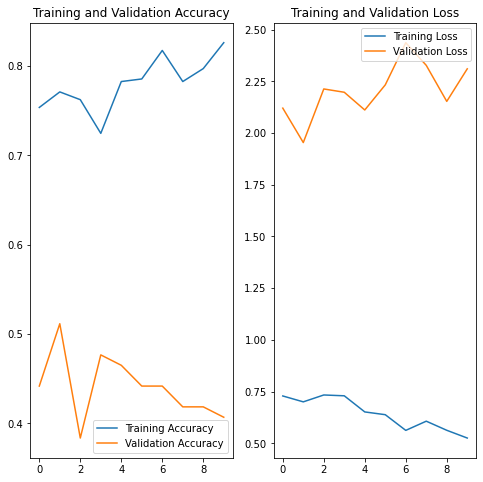

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()